In [5]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import seaborn as sns
import datetime
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv('cities.csv')
df.head()


id       name  state_id state_code  state_name  country_id country_code  \
0   52  Ashkāsham      3901        BDS  Badakhshan           1           AF   
1   68   Fayzabad      3901        BDS  Badakhshan           1           AF   
2   78       Jurm      3901        BDS  Badakhshan           1           AF   
3   84    Khandūd      3901        BDS  Badakhshan           1           AF   
4  115  Rāghistān      3901        BDS  Badakhshan           1           AF   

  country_name  latitude  longitude wikiDataId  
0  Afghanistan  36.68333   71.53333   Q4805192  
1  Afghanistan  37.11664   70.58002    Q156558  
2  Afghanistan  36.86477   70.83421  Q10308323  
3  Afghanistan  36.95127   72.31800   Q3290334  
4  Afghanistan  37.66079   70.67346   Q2670909

In [7]:
df.describe()

id       state_id     country_id       latitude  \
count  148061.000000  148061.000000  148061.000000  148061.000000   
mean    74445.319807    2584.171713     140.393135      32.110302   
std     43073.189112    1319.381847      70.883390      22.649701   
min         1.000000       1.000000       1.000000     -75.000000   
25%     37193.000000    1443.000000      82.000000      19.637220   
50%     74301.000000    2059.000000     142.000000      40.880870   
75%    111962.000000    3742.000000     207.000000      47.316670   
max    149307.000000    5068.000000     247.000000      73.508190   

           longitude  
count  148061.000000  
mean        2.278198  
std        68.345756  
min      -179.121980  
25%       -60.943750  
50%         8.863830  
75%        27.733330  
max       179.466000

In [8]:
from datashader.utils import lnglat_to_meters as webm
x, y = webm(df.longitude, df.latitude)
df['x'] = pd.Series(x)
df['y'] = pd.Series(y)

In [9]:
df.head()

id       name  state_id state_code  state_name  country_id country_code  \
0   52  Ashkāsham      3901        BDS  Badakhshan           1           AF   
1   68   Fayzabad      3901        BDS  Badakhshan           1           AF   
2   78       Jurm      3901        BDS  Badakhshan           1           AF   
3   84    Khandūd      3901        BDS  Badakhshan           1           AF   
4  115  Rāghistān      3901        BDS  Badakhshan           1           AF   

  country_name  latitude  longitude wikiDataId             x             y  
0  Afghanistan  36.68333   71.53333   Q4805192  7.963054e+06  4.395059e+06  
1  Afghanistan  37.11664   70.58002    Q156558  7.856932e+06  4.455377e+06  
2  Afghanistan  36.86477   70.83421  Q10308323  7.885228e+06  4.420274e+06  
3  Afghanistan  36.95127   72.31800   Q3290334  8.050403e+06  4.432317e+06  
4  Afghanistan  37.66079   70.67346   Q2670909  7.867334e+06  4.531617e+06

In [10]:
# ID

df['id'] = df['id'].astype(int)

In [11]:
geo = df
agg_name = 'id'
geo[agg_name].describe().to_frame()

id
count  148061.000000
mean    74445.319807
std     43073.189112
min         1.000000
25%     37193.000000
50%     74301.000000
75%    111962.000000
max    149307.000000

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
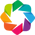

In [12]:
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
hv.extension('bokeh')
%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.5)

T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img

In [31]:
plot_map(geo, 'cities in the world', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y id)

In [14]:
# plot wtih datashader - image with black background
import datashader as ds
from datashader import transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from IPython.core.display import HTML, display
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr

background = "black"
cm = partial(colormap_select, reverse=(background!="black"))
export = partial(export_image, background = background, export_path="export")
display(HTML("<style>.container { width:100% !important; }</style>"))
W = 700 
def create_map(data, cmap, data_agg, export_name='img'):
    pad = (data.x.max() - data.x.min())/50
    x_range, y_range = ((data.x.min() - pad, data.x.max() + pad), 
                             (data.y.min() - pad, data.y.max() + pad))

    ratio = (y_range[1] - y_range[0]) / (x_range[1] - x_range[0])

    plot_width  = int(W)
    plot_height = int(plot_width * ratio)
    if ratio > 1.5:
        plot_height = 550
        plot_width = int(plot_height / ratio)
        
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)

    agg = cvs.points(data, 'x', 'y', data_agg)
    img = tf.shade(agg, cmap=cmap, how='eq_hist')
    return export(img, export_name)
     

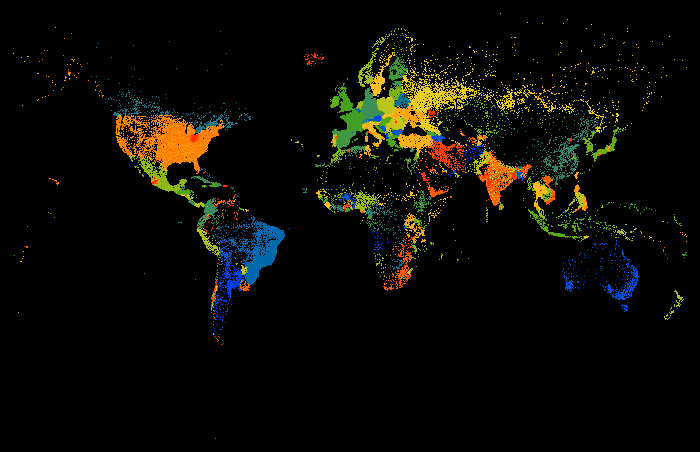

In [15]:
create_map(geo, rainbow, ds.mean(agg_name),'id')

In [16]:
df_usa = df[(df['country_code'] == 'US')]
df_usa

id            name  state_id state_code state_name  country_id  \
126822  110968       Abbeville      1456         AL    Alabama         233   
126823  111032      Adamsville      1456         AL    Alabama         233   
126824  111083       Alabaster      1456         AL    Alabama         233   
126825  111120     Albertville      1456         AL    Alabama         233   
126826  111146  Alexander City      1456         AL    Alabama         233   
...        ...             ...       ...        ...        ...         ...   
146635  129064   Weston County      1442         WY    Wyoming         233   
146636  129109       Wheatland      1442         WY    Wyoming         233   
146637  129333          Wilson      1442         WY    Wyoming         233   
146638  129589         Worland      1442         WY    Wyoming         233   
146639  129606          Wright      1442         WY    Wyoming         233   

       country_code   country_name  latitude  longitude wikiDataId  \
126822           US  United States  31.57184  -85.25049     Q79806   
126823           US  United States  33.60094  -86.95611     Q79989   
126824           US  United States  33.24428  -86.81638     Q79936   
126825           US  United States  34.26783  -86.20878     Q79675   
126826           US  United States  32.94401  -85.95385     Q79663   
...             ...            ...       ...        ...        ...   
146635           US  United States  43.84049 -104.56783    Q115413   
146636           US  United States  42.05407 -104.95295    Q547093   
146637           US  United States  43.50076 -110.87521   Q1940623   
146638           US  United States  44.01690 -107.95537    Q845469   
146639           US  United States  43.75124 -105.49201   Q1029861   

                   x             y  
126822 -9.490041e+06  3.707238e+06  
126823 -9.679910e+06  3.975343e+06  
126824 -9.664355e+06  3.927773e+06  
126825 -9.596717e+06  4.064822e+06  
126826 -9.568339e+06  3.887875e+06  
...              ...           ...  
146635 -1.164044e+07  5.440791e+06  
146636 -1.168331e+07  5.169082e+06  
146637 -1.234257e+07  5.388506e+06  
146638 -1.201754e+07  5.468058e+06  
146639 -1.174332e+07  5.427026e+06  

[19818 rows x 13 columns]

In [17]:
plot_map(df_usa, 'cities in the US', ds.min(agg_name), agg_name, cmap=rainbow)


:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y id)

In [18]:
df_fl = df[(df['state_name'] == 'Florida')]
df_fl.head()

id            name  state_id state_code state_name  country_id  \
129471  110972        Aberdeen      1436         FL    Florida         233   
129472  111084         Alachua      1436         FL    Florida         233   
129473  111085  Alachua County      1436         FL    Florida         233   
129474  111086         Alafaya      1436         FL    Florida         233   
129475  111177      Allapattah      1436         FL    Florida         233   

       country_code   country_name  latitude  longitude wikiDataId  \
129471           US  United States  26.55063  -80.14866   Q4666865   
129472           US  United States  29.75163  -82.42483    Q985175   
129473           US  United States  29.67476  -82.35770    Q488826   
129474           US  United States  28.56410  -81.21140   Q4705552   
129475           US  United States  25.81454  -80.22394   Q1660549   

                   x             y  
129471 -8.922108e+06  3.067440e+06  
129472 -9.175490e+06  3.471664e+06  
129473 -9.168017e+06  3.461811e+06  
129474 -9.040412e+06  3.320282e+06  
129475 -8.930488e+06  2.976129e+06

In [19]:
plot_map(df_fl, 'cities in the Florida State', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y id)

In [20]:
df_india = df[(df['country_name'] == 'India')]
df_india.head()

id           name  state_id state_code  \
44809   57837    Bamboo Flat      4023         AN   
44810  133213        Nicobar      4023         AN   
44811  133482     Port Blair      4023         AN   
44812  134006  South Andaman      4023         AN   
44813   57593        Addanki      4017         AP   

                        state_name  country_id country_code country_name  \
44809  Andaman and Nicobar Islands         101           IN        India   
44810  Andaman and Nicobar Islands         101           IN        India   
44811  Andaman and Nicobar Islands         101           IN        India   
44812  Andaman and Nicobar Islands         101           IN        India   
44813               Andhra Pradesh         101           IN        India   

       latitude  longitude wikiDataId             x             y  
44809  11.70000   92.71667    Q627037  1.032117e+07  1.311585e+06  
44810   7.03002   93.79028    Q797295  1.044069e+07  7.845492e+05  
44811  11.66613   92.74635    Q203476  1.032448e+07  1.307735e+06  
44812  10.75776   92.52136    Q796979  1.029943e+07  1.204647e+06  
44813  15.81061   79.97338   Q2350169  8.902596e+06  1.782801e+06

In [21]:
plot_map(df_india, 'cities in India', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y id)

In [22]:
df_ce = df.query("country_name=='Italy' or country_name=='United Kingdom'or country_name=='Spain'")
df_ce.head()

id            name  state_id state_code state_name  country_id  \
51632  135240      Abbateggio      1679         65    Abruzzo         107   
51633  135250         Acciano      1679         65    Abruzzo         107   
51634  135325          Aielli      1679         65    Abruzzo         107   
51635  135342          Alanno      1679         65    Abruzzo         107   
51636  135347  Alba Adriatica      1679         65    Abruzzo         107   

      country_code country_name  latitude  longitude wikiDataId             x  \
51632           IT        Italy  42.22421   14.01001    Q335596  1.559587e+06   
51633           IT        Italy  42.17677   13.71783   Q3321966  1.527062e+06   
51634           IT        Italy  42.08146   13.59113     Q16112  1.512958e+06   
51635           IT        Italy  42.29552   13.97084  Q18441902  1.555227e+06   
51636           IT        Italy  42.83176   13.92590  Q18441902  1.550224e+06   

                  y  
51632  5.194624e+06  
51633  5.187496e+06  
51634  5.173190e+06  
51635  5.205350e+06  
51636  5.286399e+06

In [23]:
plot_map(df_ce, 'cities in Italy, Spain and United Kingdom', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y id)

In [24]:
df_af = df.query("country_name=='Nigeria' or country_name=='South Africa'or country_name=='Zambia'")
df_af.head()

id          name  state_id state_code state_name  country_id  \
77913  76744           Aba       303         AB       Abia         161   
77914  76769       Amaigbo       303         AB       Abia         161   
77915  76779     Arochukwu       303         AB       Abia         161   
77916  76799         Bende       303         AB       Abia         161   
77917  77057  Ohafia-Ifigh       303         AB       Abia         161   

      country_code country_name  latitude  longitude wikiDataId  \
77913           NG      Nigeria   5.10658    7.36667    Q202162   
77914           NG      Nigeria   5.78917    7.83829    Q423831   
77915           NG      Nigeria   5.38941    7.91235    Q617618   
77916           NG      Nigeria   5.55874    7.63359    Q811144   
77917           NG      Nigeria   5.61455    7.81191   Q7080311   

                   x              y  
77913  820053.953242  569215.984899  
77914  872554.451490  645546.801300  
77915  880798.772978  600833.043618  
77916  849767.351725  619769.138715  
77917  869617.843323  626011.530368

In [25]:
plot_map(df_af, 'cities in Nigeria, Zambia and South Africa', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y id)

In [26]:
df_br = df.query("country_name=='Brazil'")
df_br.head()

id          name  state_id state_code state_name  country_id  \
10196  10078    Acrelândia      2012         AC       Acre          31   
10197  10428  Assis Brasil      2012         AC       Acre          31   
10198  10774     Brasiléia      2012         AC       Acre          31   
10199  10819        Bujari      2012         AC       Acre          31   
10200  11091      Capixaba      2012         AC       Acre          31   

      country_code country_name  latitude  longitude wikiDataId             x  \
10196           BR       Brazil  -9.98045  -66.84388    Q507567 -7.441027e+06   
10197           BR       Brazil -10.88334  -70.01314    Q742227 -7.793827e+06   
10198           BR       Brazil -11.01611  -68.74806    Q899406 -7.652999e+06   
10199           BR       Brazil  -9.57859  -68.17197   Q1793226 -7.588869e+06   
10200           BR       Brazil -10.48782  -67.84831   Q1750439 -7.552839e+06   

                  y  
10196 -1.116680e+06  
10197 -1.218880e+06  
10198 -1.233934e+06  
10199 -1.071286e+06  
10200 -1.174074e+06

In [27]:
plot_map(df_br, 'cities in Brazil and Chile', ds.min(agg_name), agg_name, cmap=fire)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y id)

In [28]:
df_sp = df[(df['state_code'] == 'SP')]
df_sp.head()

id              name  state_id state_code state_name  country_id  \
14969  10080        Adamantina      2021         SP  São Paulo          31   
14970  10082            Adolfo      2021         SP  São Paulo          31   
14971  10096             Aguaí      2021         SP  São Paulo          31   
14972  15671    Águas da Prata      2021         SP  São Paulo          31   
14973  15673  Águas de Lindóia      2021         SP  São Paulo          31   

      country_code country_name  latitude  longitude wikiDataId             x  \
14969           BR       Brazil -21.59136  -51.06669   Q1637498 -5.684718e+06   
14970           BR       Brazil -21.28535  -49.65497    Q676044 -5.527566e+06   
14971           BR       Brazil -22.02590  -47.06702   Q1760037 -5.239477e+06   
14972           BR       Brazil -21.91623  -46.68666   Q1756246 -5.197135e+06   
14973           BR       Brazil -22.47639  -46.63278    Q249869 -5.191137e+06   

                  y  
14969 -2.462533e+06  
14970 -2.425936e+06  
14971 -2.514635e+06  
14972 -2.501471e+06  
14973 -2.568818e+06

In [29]:
plot_map(df_sp, 'Cities in the State of São Paulo - Brazil', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y id)

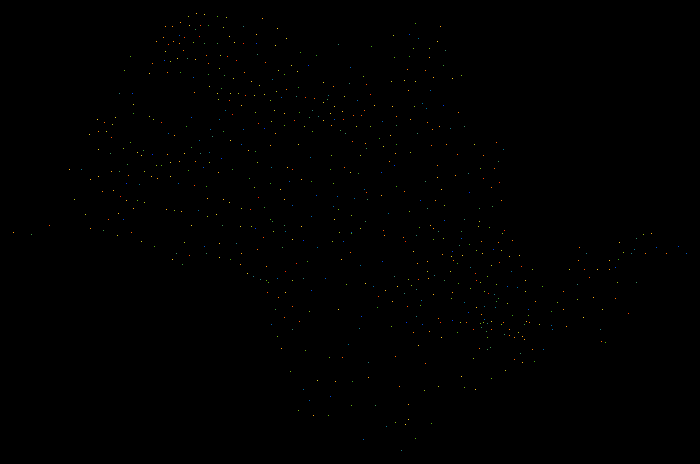

In [30]:
create_map(df_sp, rainbow, ds.mean(agg_name),'id')